# EXPLORATORY DATA ANALYSIS ON A DATASET

#### Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.


### Tasks:

##### 1.	Data Cleaning and Preparation:
* Load the dataset into a data frame or equivalent data structure.
*	Handle missing values appropriately (e.g., imputation, deletion).
*	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
*	Detect and treat outliers if necessary.
##### 2.	Statistical Summary:
*	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
*	Highlight any interesting findings from this summary.
##### 3.	Data Visualization:
*	Create histograms or boxplots to visualize the distributions of various numerical variables.
*	Use bar charts or pie charts to display the frequency of categories for categorical variables.
*	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
*	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
##### 4.	Pattern Recognition and Insights:
*	Identify any correlations between variables and discuss their potential implications.
*	Look for trends or patterns over time if temporal data is available.
##### 5.	Conclusion:
*	Summarize the key insights and patterns discovered through your exploratory analysis.
*	Discuss how these findings could impact decision-making or further analyses.


### 1.	Data Cleaning and Preparation

In [1]:
# ●	Load the dataset into a data frame or equivalent data structure
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv(r'Dataset\Cardiotocographic.csv')  
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [2]:
# ●	Handle missing values appropriately (e.g., imputation, deletion).
# Check for missing values
df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [3]:
# Fill Missing values
df.fillna(df.mean(), inplace=True)
# Verify that there are no more missing values
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [4]:
# ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
# Check data types
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


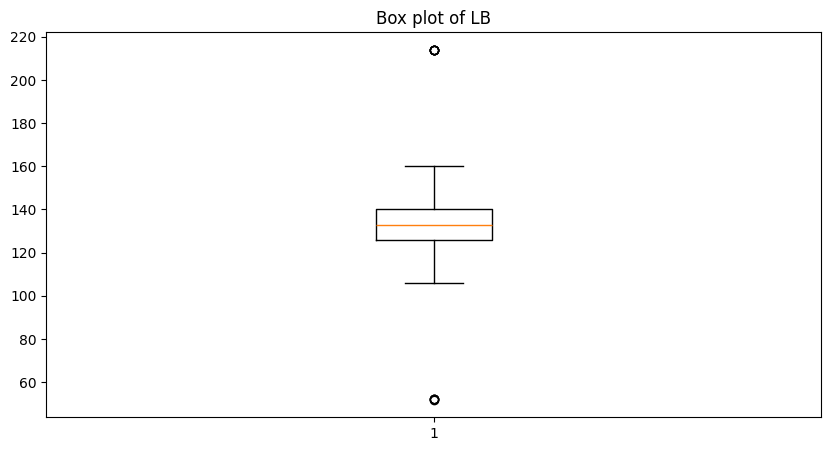

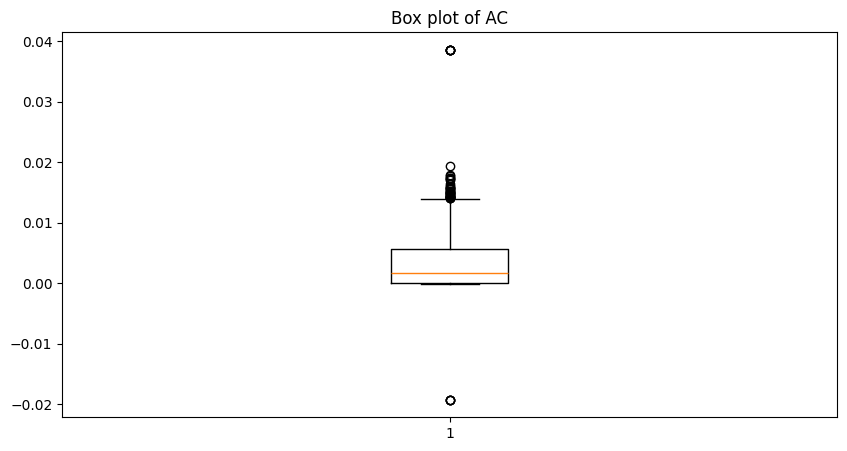

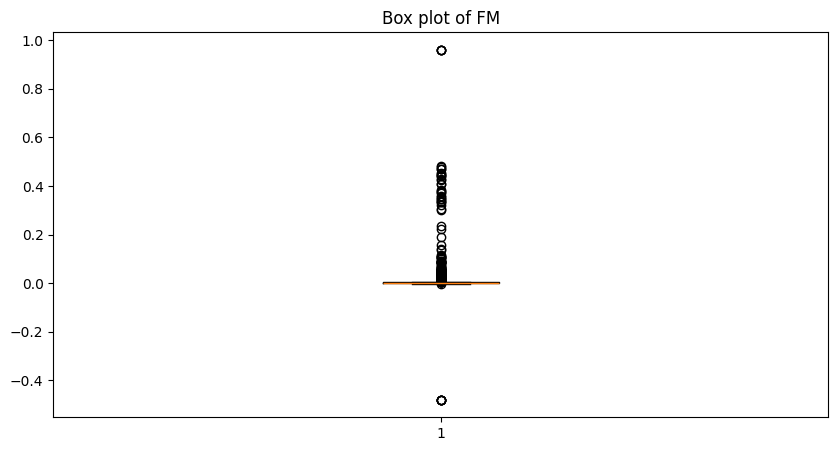

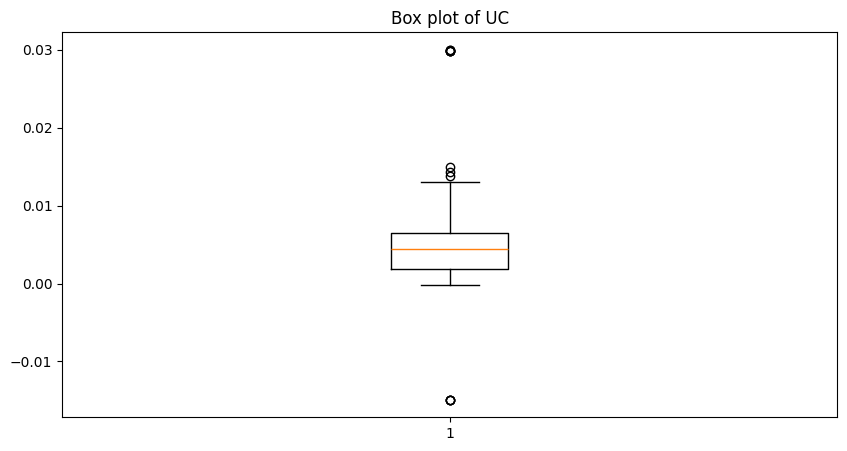

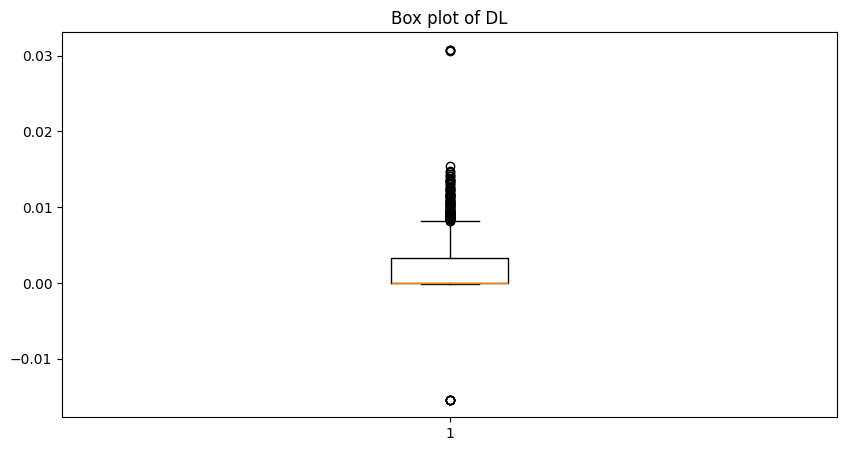

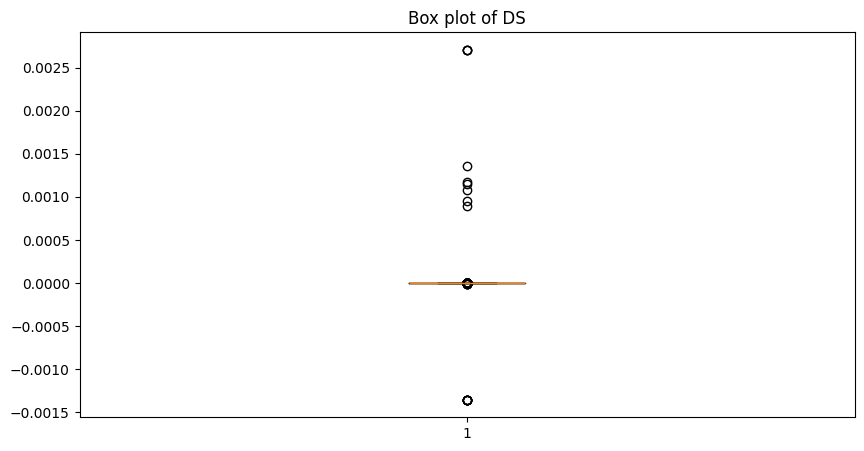

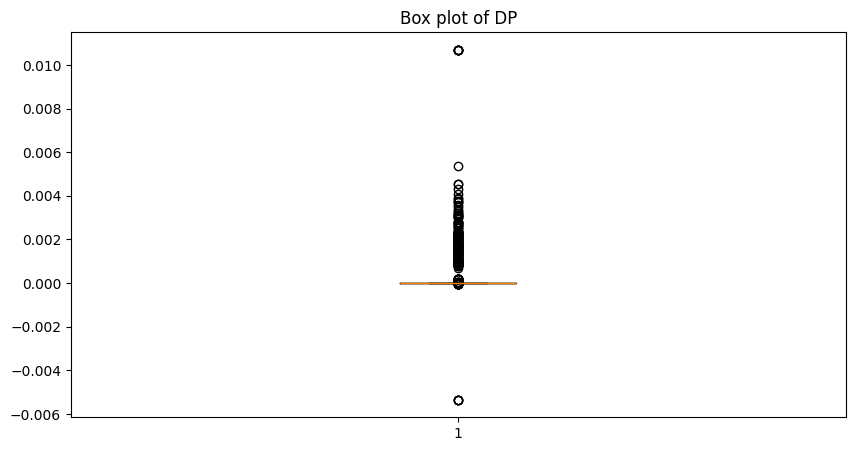

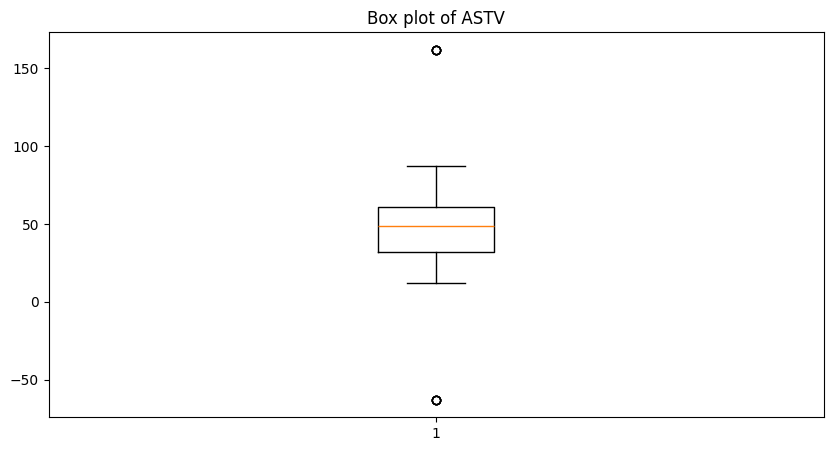

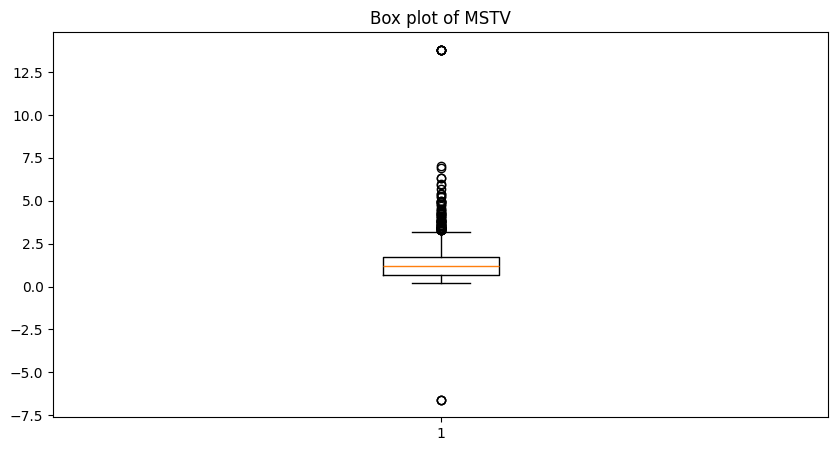

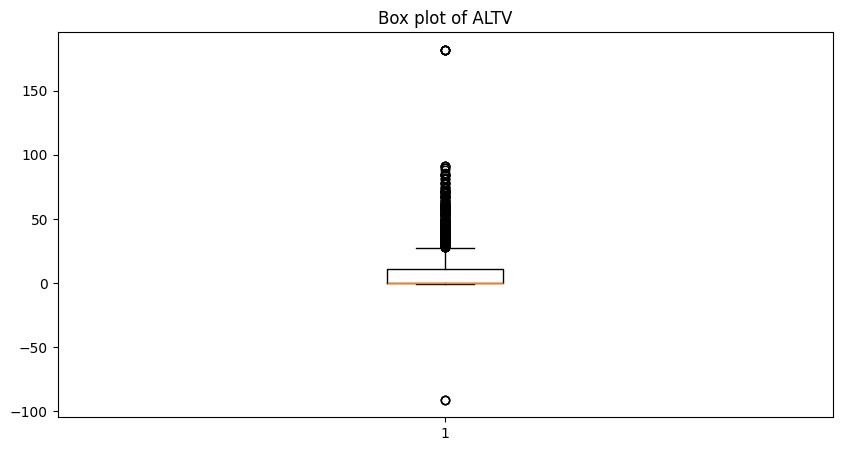

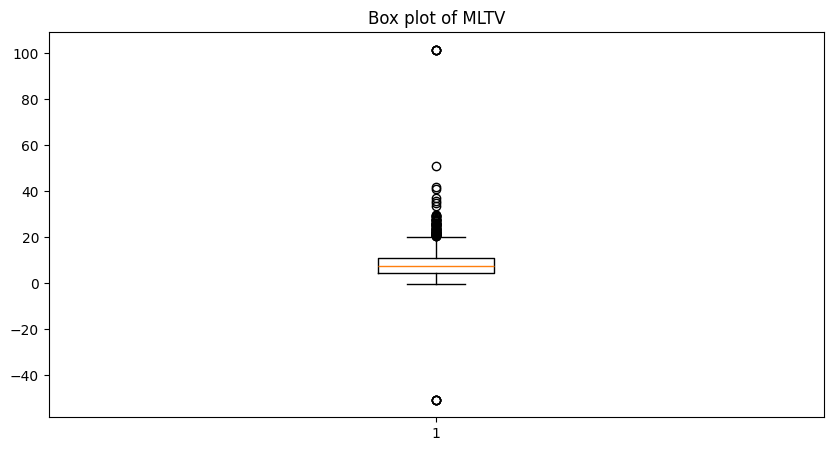

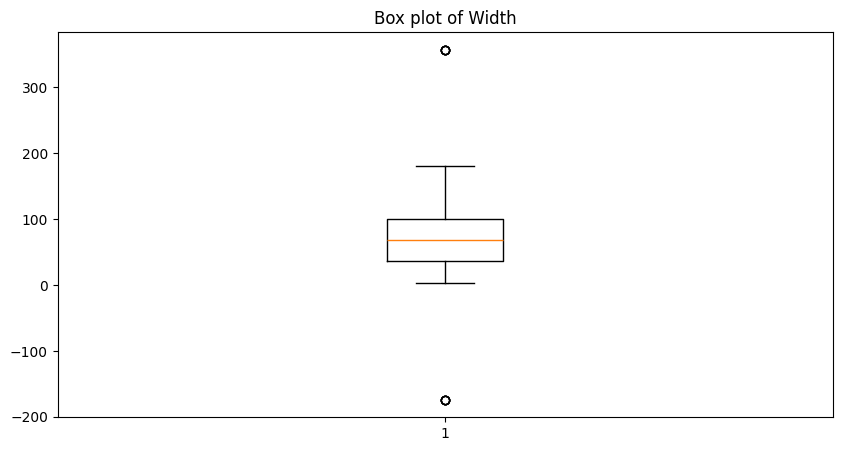

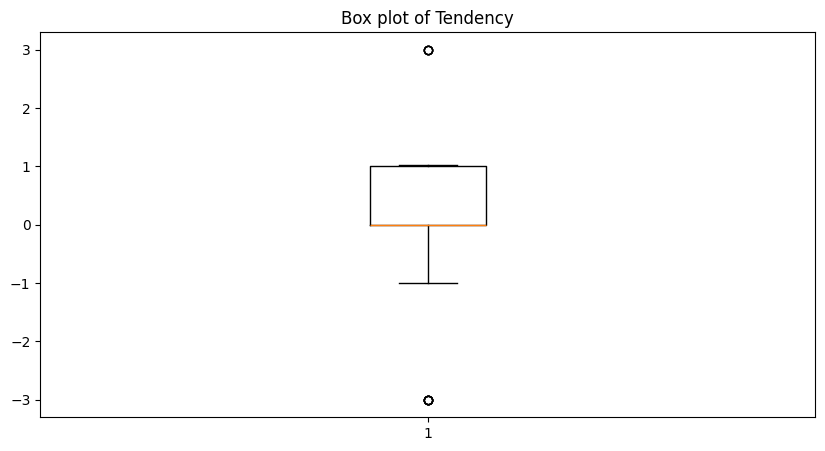

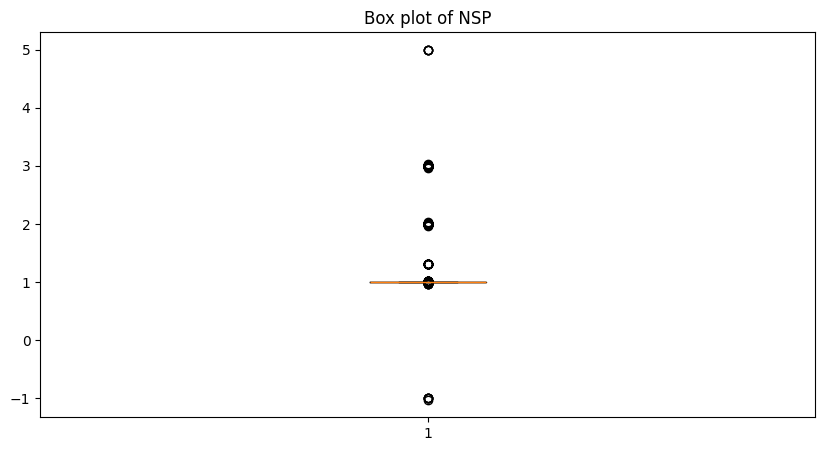

In [5]:
# ●	Detect and treat outliers if necessary
import matplotlib.pyplot as plt
# Detect outliers using box plots
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [6]:
# Handle ouyliers with IQR method exccept for NSP which is the target variable.
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'NSP':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: max(min(x, upper_bound), lower_bound))


### 2.	Statistical Summary

In [7]:
# ●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
# Statistical summary
summary = df.describe()
print(summary)
iqr = df.quantile(0.75) - df.quantile(0.25)
print("\nInterquartile Range (IQR) for each variable:")
print(iqr)

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.293725     0.003147     0.001568     0.004362     0.001770   
std       9.930227     0.003826     0.002485     0.003001     0.002668   
min     105.000000    -0.008409    -0.003850    -0.005177    -0.004934   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    46.981873     1.304644     6.691678     8.016212   
std       0.0     0.0    17.612745     0.781091    10.378400     5.046784   
min       0.0     0.0   -

In [8]:
# ●	Highlight any interesting findings from this summary.
# 1. Negative minimums in several variables that should logically be non-negative
# So outliers exist.
# 2. Zero-inflated variables - DS, DP, and ALTV have a large number of zero values, which may indicate that they are zero-inflated and may require special handling in analysis.

In [9]:
# handle negative values
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = df[column].apply(lambda x: max(x, 0)) # Set negative values to zero
summary = df.describe()
print(summary)

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.293725     0.003164     0.001602     0.004372     0.001785   
std       9.930227     0.003794     0.002446     0.002978     0.002646   
min     105.000000     0.000000     0.000000     0.000000     0.000000   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    47.008919     1.305773     6.721101     8.027677   
std       0.0     0.0    17.531524     0.778622    10.340617     5.023342   
min       0.0     0.0    

In [10]:
# Rounding off LB, ASTV, ALTV,Width, Tendency, and NSP to no decimal places and make them more readable.
columns_to_round = ['LB', 'ASTV', 'ALTV', 'Width', 'Tendency', 'NSP']
df[columns_to_round] = df[columns_to_round].round(0)
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,28.0,2.4,64.0,1.0,2.0
1,132.0,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.0,1.0
2,133.0,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.0,1.0
3,134.0,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.1,117.0,1.0,1.0
4,132.0,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000000,0.006416,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,0.0,2.0
2122,140.0,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,1.0,2.0
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,1.0,2.0
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,1.0,2.0


In [11]:
# Drop columns DS and DP
df.drop(columns=['DS','DP'],inplace=True)

In [12]:
summary = df.describe()
print(summary)
iqr = df.quantile(0.75) - df.quantile(0.25)
print("\nInterquartile Range (IQR) for each variable:")
print(iqr)

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.291157     0.003164     0.001602     0.004372     0.001785   
std       9.930790     0.003794     0.002446     0.002978     0.002646   
min     105.000000     0.000000     0.000000     0.000000     0.000000   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

              ASTV         MSTV         ALTV         MLTV        Width  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean     47.005644     1.305773     6.792568     8.027677    70.450141   
std      17.528571     0.778622    10.490904     5.023342    39.227195   
min       0.000000     0.000000     0

### 3.	Data Visualization

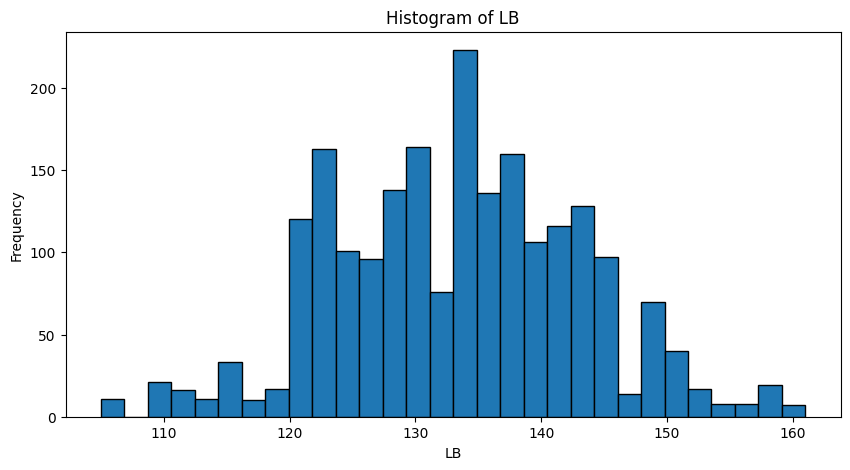

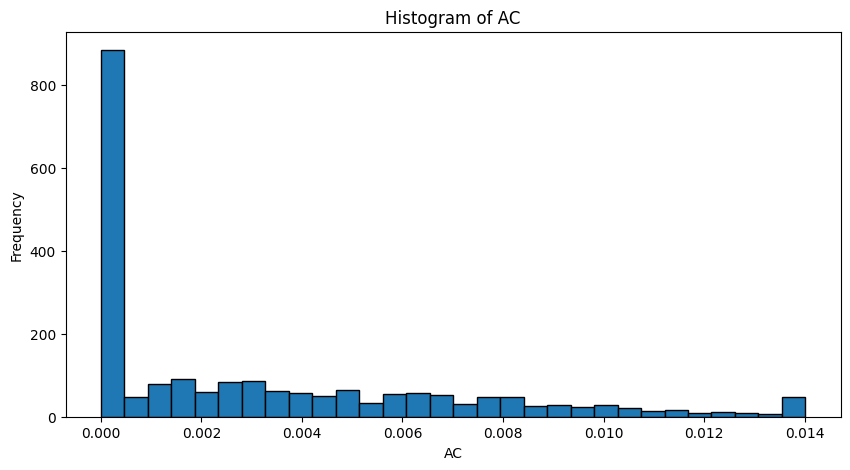

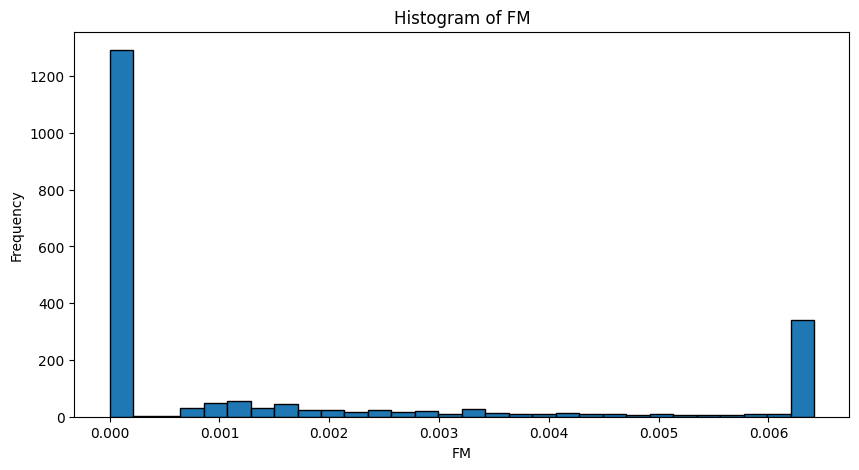

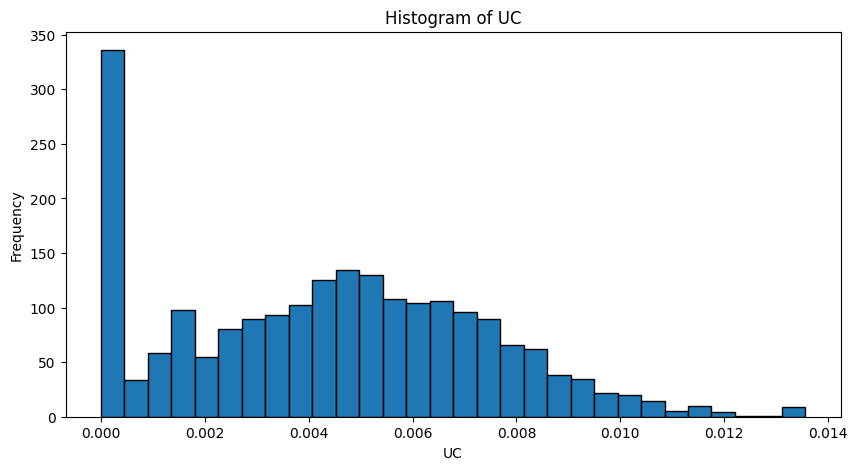

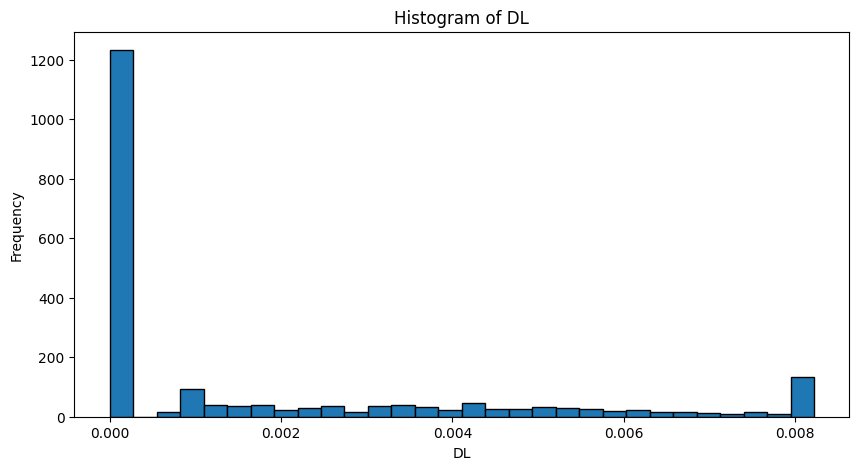

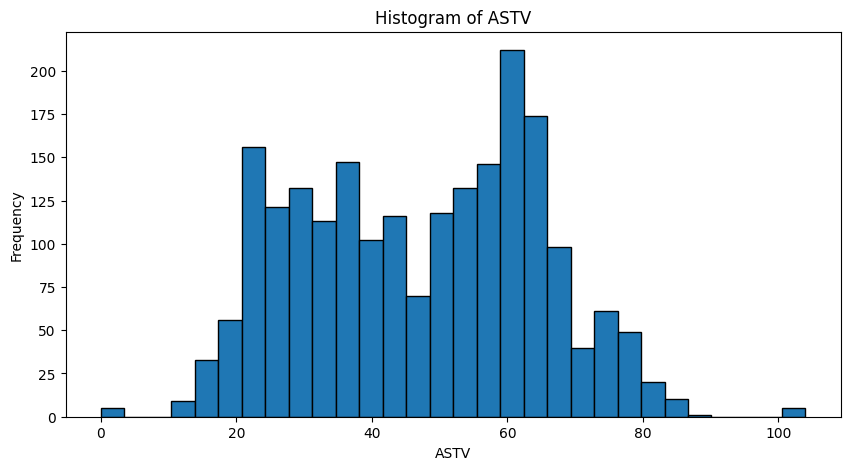

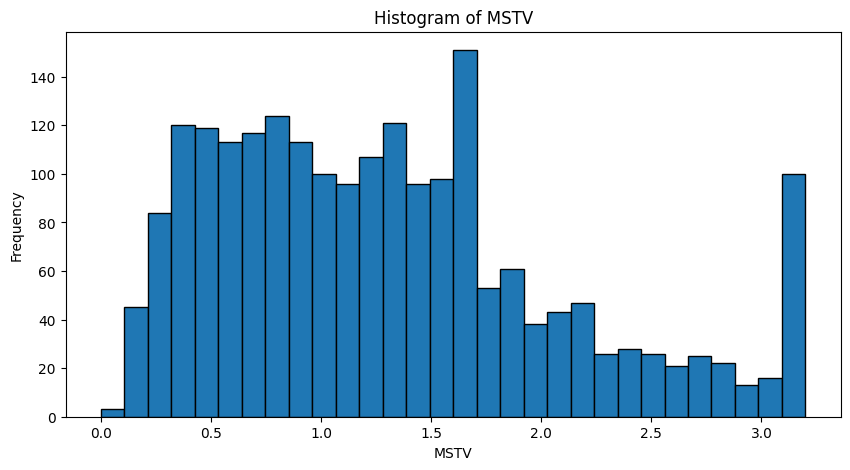

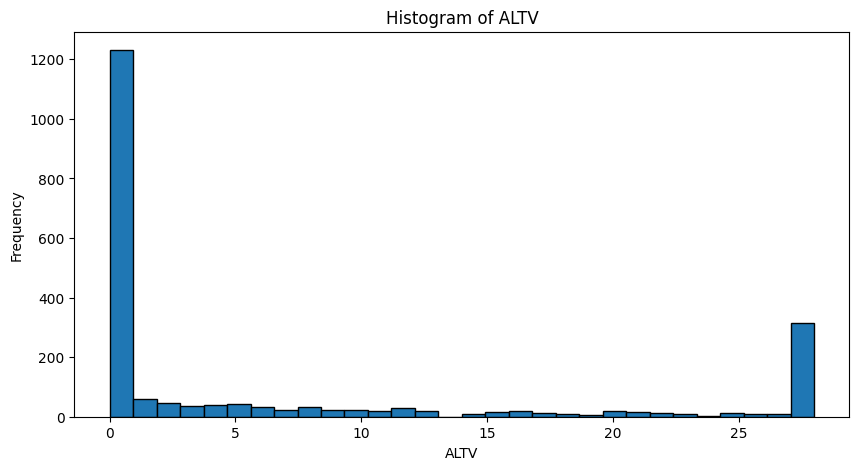

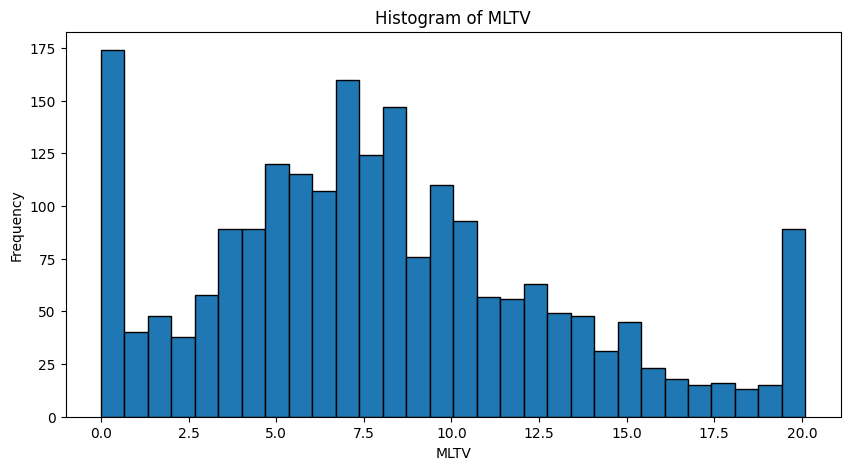

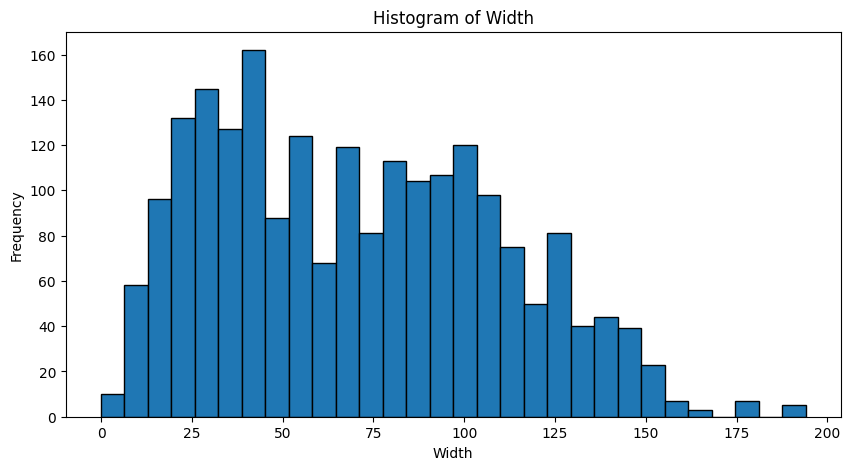

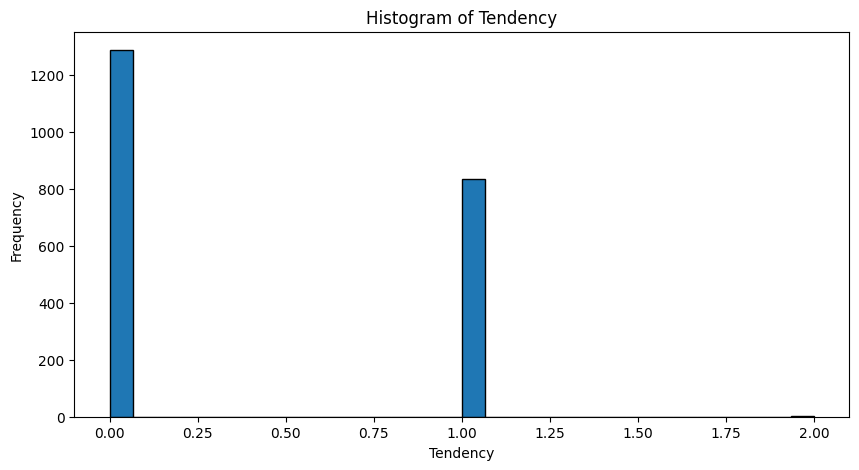

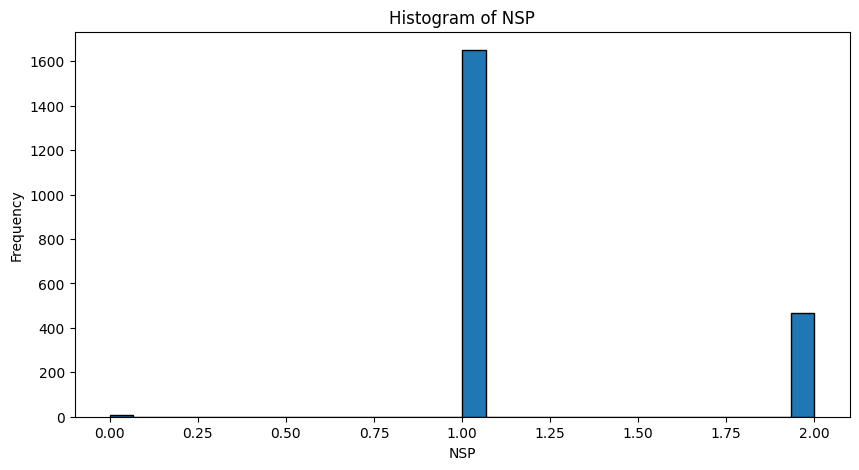

In [13]:
# ●	Create histograms or boxplots to visualize the distributions of various numerical variables.
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df[column], bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

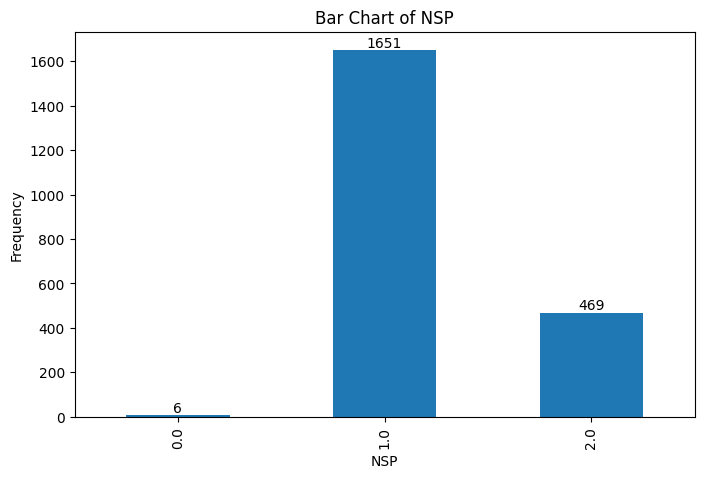

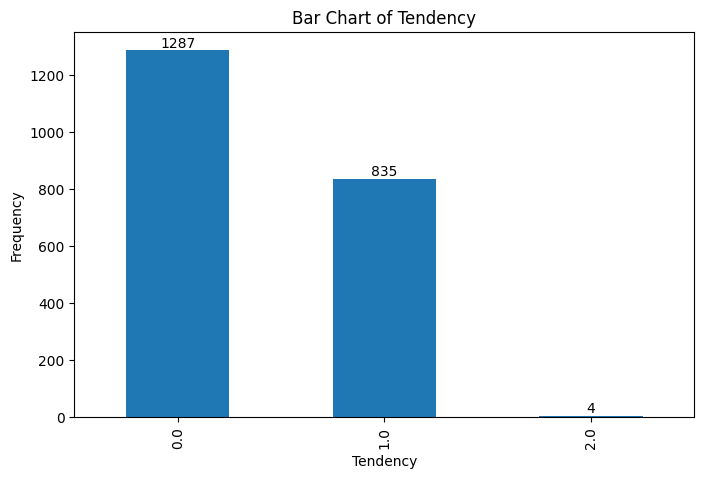

In [14]:
# ●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
# NSP and Tendency are categorical variables.
for column in ['NSP', 'Tendency']:
    counts = df[column].value_counts().sort_index()
    plt.figure(figsize=(8, 5))
    ax = counts.plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

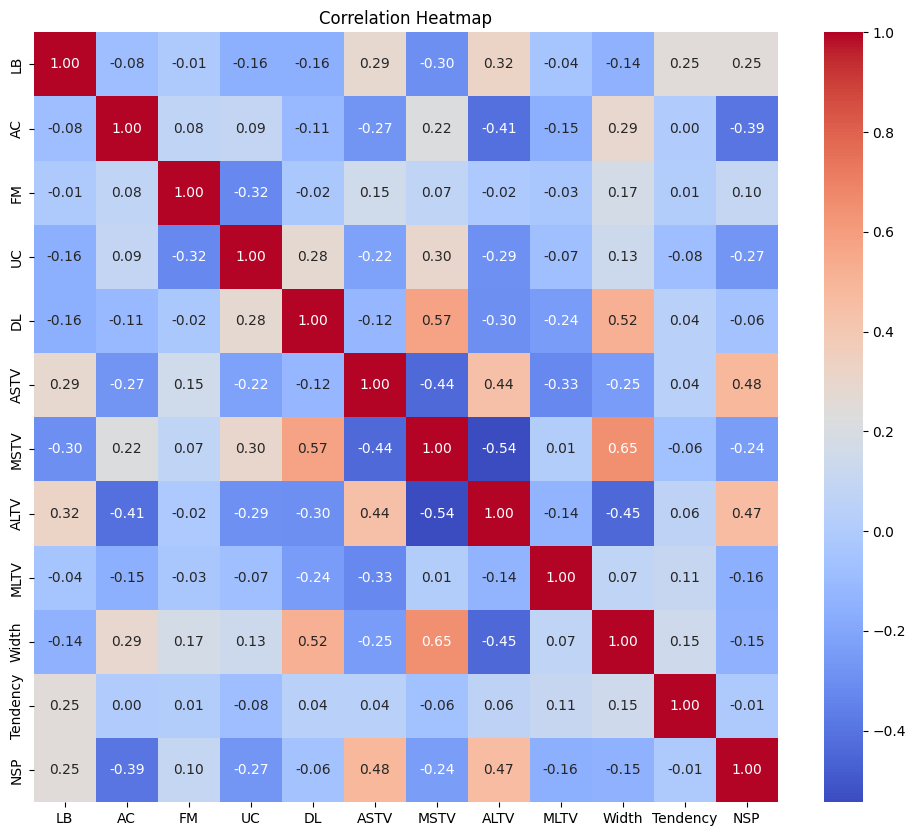

In [15]:
# ●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
# Correlation heatmap
import seaborn as sns
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap');


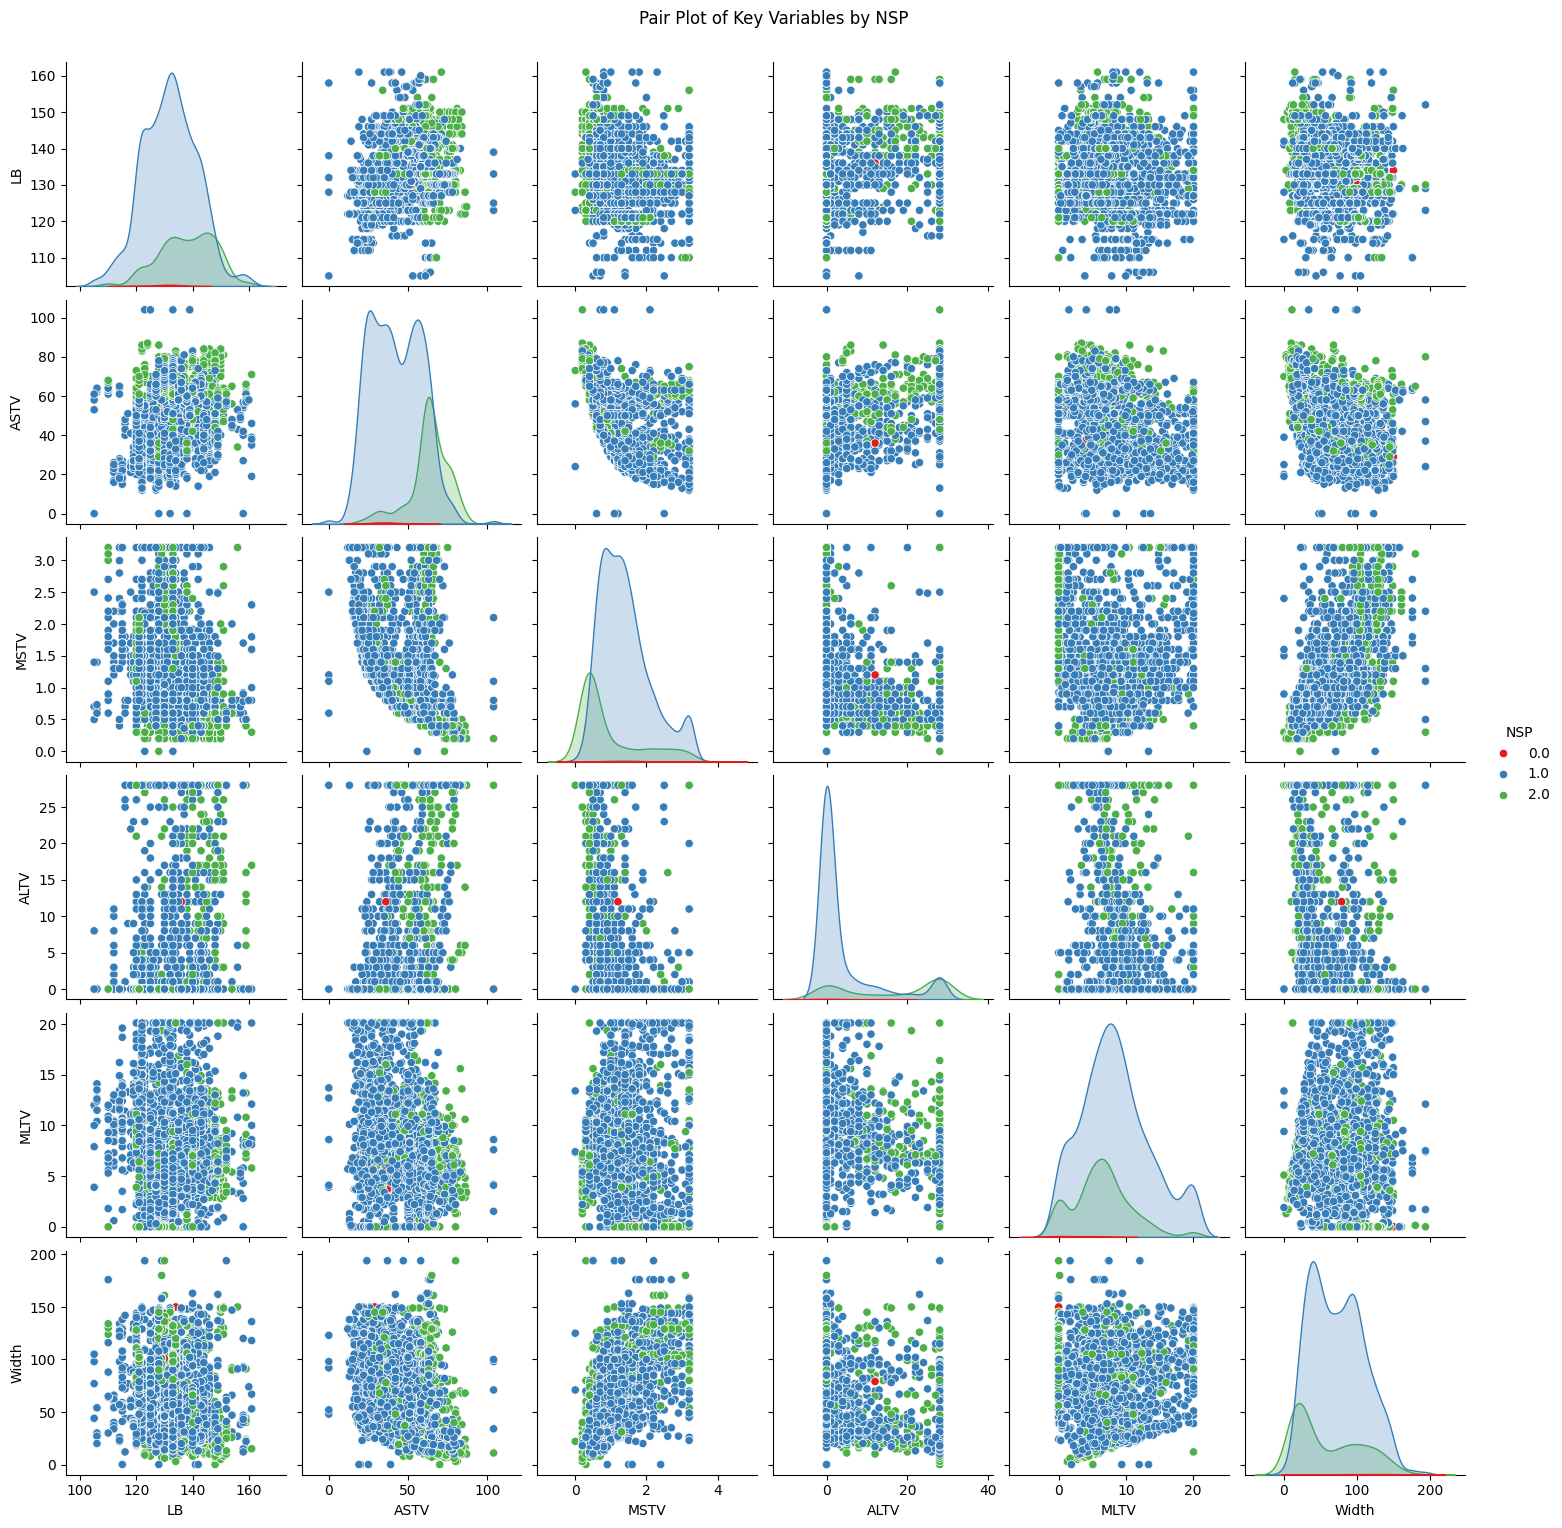

In [16]:
# ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
# Pair plot for key variables (selecting subset to avoid overcrowding)
key_vars = ['LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'NSP']
sns.pairplot(df[key_vars], hue='NSP', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Key Variables by NSP', y=1.02)
plt.show()

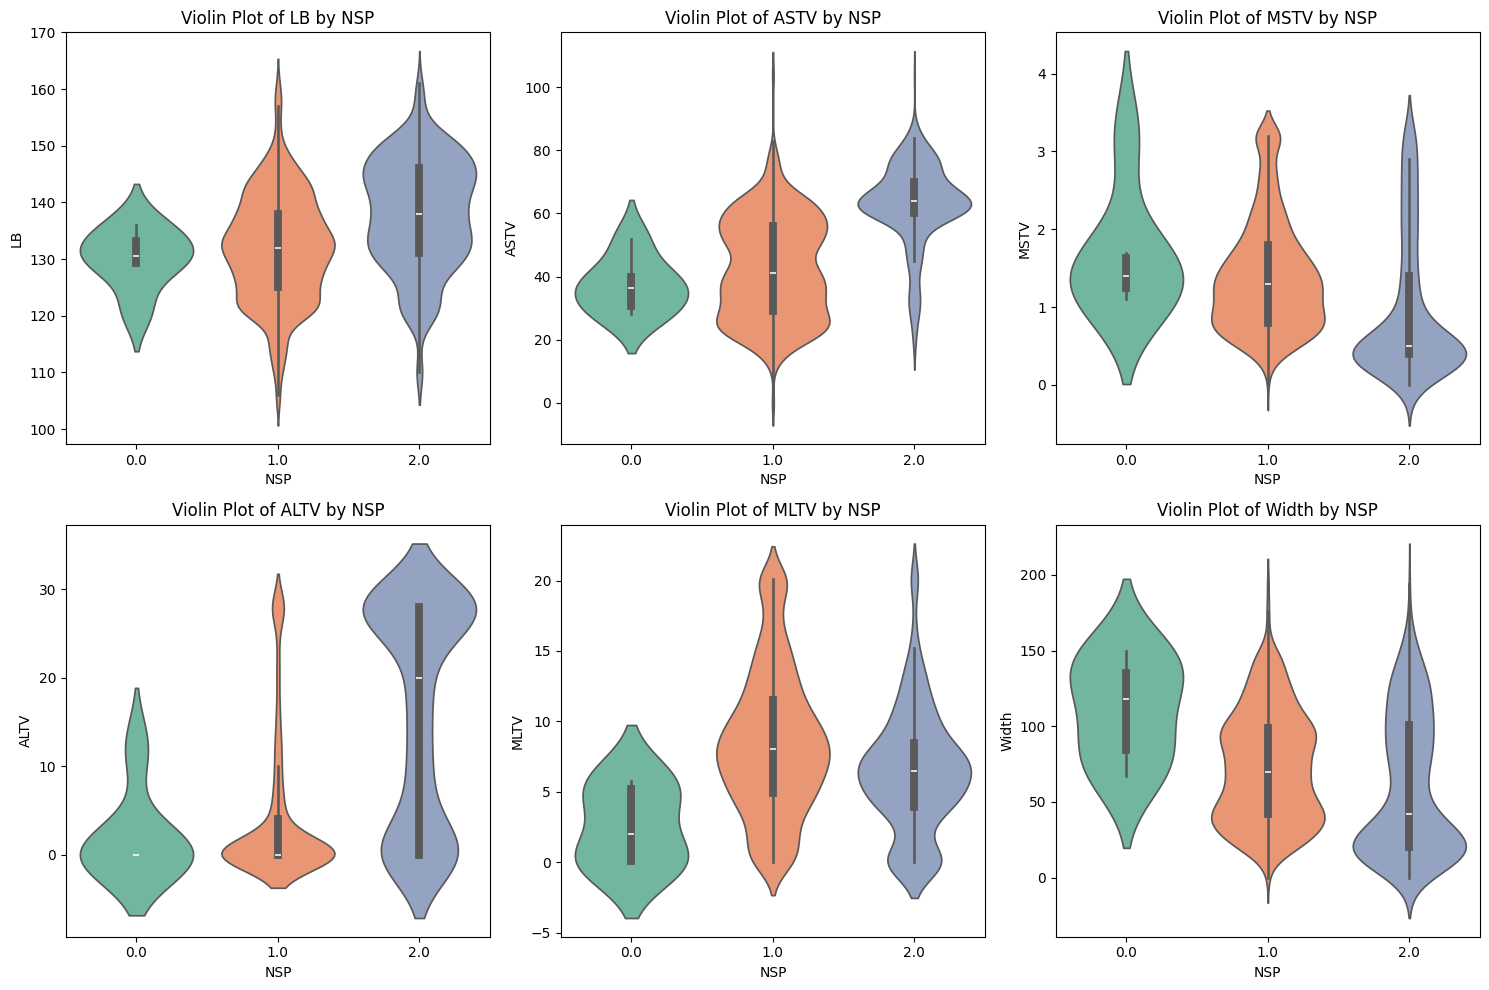

In [17]:
# Violin plots to show distribution of key variables across NSP categories
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
variables = ['LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']

for ax, var in zip(axes.flatten(), variables):
    sns.violinplot(x='NSP', y=var, data=df, ax=ax, palette='Set2')
    ax.set_title(f'Violin Plot of {var} by NSP')

plt.tight_layout()
plt.show()

### 4.	Pattern Recognition and Insights

In [18]:
# ●	Identify any correlations between variables and discuss their potential implications.

# Display correlation matrix sorted by absolute correlation with NSP
correlations_with_nsp = correlation_matrix['NSP'].drop('NSP').sort_values(key=abs, ascending=False)
print("Correlations with NSP (Target Variable):")
print(correlations_with_nsp)

# Find highly correlated variable pairs (excluding self-correlation)
print("\n" + "="*60)
print("Highly Correlated Variable Pairs (|r| > 0.5):")
print("="*60)

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"{correlation_matrix.columns[i]} & {correlation_matrix.columns[j]}: {corr_val:.3f}")


Correlations with NSP (Target Variable):
ASTV        0.483646
ALTV        0.469185
AC         -0.393047
UC         -0.268871
LB          0.251062
MSTV       -0.238786
MLTV       -0.158379
Width      -0.145730
FM          0.099710
DL         -0.058446
Tendency   -0.008161
Name: NSP, dtype: float64

Highly Correlated Variable Pairs (|r| > 0.5):
DL & MSTV: 0.573
DL & Width: 0.521
MSTV & ALTV: -0.544
MSTV & Width: 0.654


### 5. Conclusion: Summary Report

---

#### Overview
This exploratory data analysis was performed on the Cardiotocographic dataset, which contains measurements from fetal heart rate (FHR) monitoring. The target variable **NSP** represents the fetal state classification - Normal (1), Suspect (2), or Pathological (3).

---

#### Data Quality Findings
- The dataset had some missing values which were handled using mean imputation.
- Found several data inconsistencies like **negative values** in variables that should logically be non-negative (e.g., heart rate metrics). These were corrected by setting them to zero.
- Detected and treated outliers using the IQR method for all variables except NSP.
- Dropped **DS** and **DP** columns as they were heavily zero-inflated and wouldn't contribute much to the analysis.

---

#### Key Statistical Insights
- **LB (Baseline Fetal Heart Rate)** has a mean around 133 bpm, which falls within the normal range (110-160 bpm).
- **ASTV** (percentage of time with abnormal short-term variability) shows significant variation across samples.
- The **Width** of the FHR histogram varies considerably, indicating different levels of heart rate variability among fetuses.
- Most cases fall into the **Normal (NSP=1)** category, with fewer Suspect and Pathological cases, making this an imbalanced classification problem.

---

#### Correlation Patterns
- **ASTV and MSTV** show strong relationships with the target variable NSP, suggesting short-term variability metrics are important indicators of fetal health.
- High correlations exist between some variable pairs (|r| > 0.5), which might lead to multicollinearity issues if used directly in predictive modeling.
- **Accelerations (AC)** and **Prolonged Decelerations** seem to have meaningful relationships with fetal state.

---

#### Visual Insights
- The histograms revealed right-skewed distributions for several variables.
- Violin plots showed clear separation between NSP categories for variables like ASTV and MSTV - higher abnormal variability tends to be associated with Suspect/Pathological cases.
- The correlation heatmap highlighted clusters of related variables that measure similar aspects of fetal heart rate behavior.

---

#### Recommendations for Further Analysis
1. **Handle Class Imbalance**: Since Normal cases dominate the dataset, consider using techniques like SMOTE or class weights when building predictive models.
2. **Feature Selection**: Given the high correlations between some variables, apply feature selection techniques (like Recursive Feature Elimination or PCA) to reduce multicollinearity.
3. **Focus on Key Predictors**: ASTV, MSTV, and accelerations seem to be strong indicators - prioritize these in model building.
4. **Cross-Validation**: Use stratified cross-validation to ensure all NSP classes are represented in train/test splits.
5. **Clinical Validation**: Any model built should be validated with domain experts to ensure clinical relevance of the predictions.

---

This EDA provides a solid foundation for building classification models to predict fetal health status from cardiotocographic measurements.